# Gradient Descent
- gradient descent https://pythonguides.com/scikit-learn-gradient-descent/

In [15]:

import numpy as np 
import random as rand
import matplotlib.pyplot as plt

def gradientDescent(X, Y, theta, alpha, m, numIterations):
    Xtrans = X.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(X, theta)
        print(hypothesis.shape)
        loss = hypothesis - Y
    
        cost = np.sum(loss **2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        print(Xtrans.shape)
        print(loss.shape)
        gradient = np.dot(Xtrans, loss) / m
        theta = theta - alpha * gradient
    
    return theta

def  genData(numPoints, bias, variance):
    X = np.zeros(shape=(numPoints, 3))
    Y = np.zeros(shape=numPoints)
    
    # print(X)
    # print(Y)
    
    # basically a straight line
    for i in range(0, numPoints):
        X[i][0] = 2
        X[i][1] = i
        Y[i] = (i + bias) + rand.uniform(0, 2) * variance
    
    return X, Y

X, Y = genData(90, 20, 9)
m, b = np.shape(X)
numIterations = 10_000
alpha = 0.0004

# this return you a column vector (b, 1)
# use np.expand_dims(1, b) to get a row vector
# https://stackoverflow.com/a/75202032

# row major
# https://numpy.org/doc/stable/reference/generated/numpy.ones.html
theta = np.ones(b)
print(theta.shape)
theta = gradientDescent(X, Y, theta, alpha, m, numIterations)
print(theta)
    

(3,)
(90,)
Iteration 0 | Cost: 385.553868
(3, 90)
(90,)
(90,)
Iteration 1 | Cost: 103.903478
(3, 90)
(90,)
(90,)
Iteration 2 | Cost: 102.702243
(3, 90)
(90,)
(90,)
Iteration 3 | Cost: 102.623393
(3, 90)
(90,)
(90,)
Iteration 4 | Cost: 102.549095
(3, 90)
(90,)
(90,)
Iteration 5 | Cost: 102.474875
(3, 90)
(90,)
(90,)
Iteration 6 | Cost: 102.400715
(3, 90)
(90,)
(90,)
Iteration 7 | Cost: 102.326615
(3, 90)
(90,)
(90,)
Iteration 8 | Cost: 102.252576
(3, 90)
(90,)
(90,)
Iteration 9 | Cost: 102.178597
(3, 90)
(90,)
(90,)
Iteration 10 | Cost: 102.104678
(3, 90)
(90,)
(90,)
Iteration 11 | Cost: 102.030818
(3, 90)
(90,)
(90,)
Iteration 12 | Cost: 101.957019
(3, 90)
(90,)
(90,)
Iteration 13 | Cost: 101.883280
(3, 90)
(90,)
(90,)
Iteration 14 | Cost: 101.809601
(3, 90)
(90,)
(90,)
Iteration 15 | Cost: 101.735982
(3, 90)
(90,)
(90,)
Iteration 16 | Cost: 101.662422
(3, 90)
(90,)
(90,)
Iteration 17 | Cost: 101.588922
(3, 90)
(90,)
(90,)
Iteration 18 | Cost: 101.515482
(3, 90)
(90,)
(90,)
Iteration 1

# Gradient descent regression

/var/folders/kz/_tgdbmcx69z1k2ql1b9qxyv00000gp/T/ipykernel_13700/3761040758.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/kz/_tgdbmcx69z1k2ql1b9qxyv00000gp/T/ipykernel_13700/3761040758.py:81: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()


90 epochs elapsed
current accuracy is: 0.9831806324337843


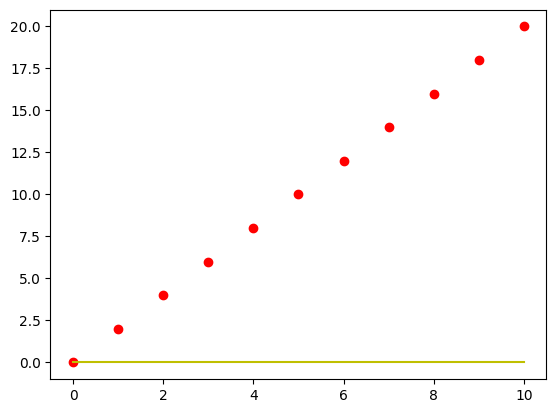

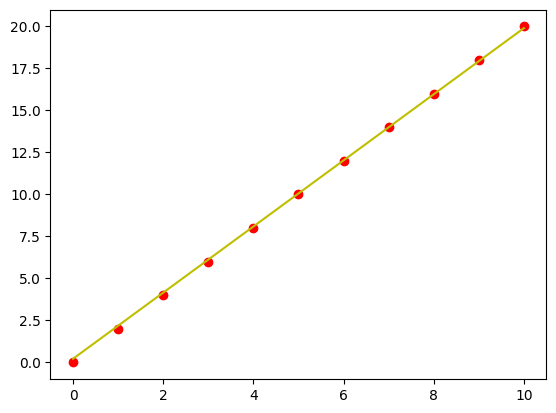

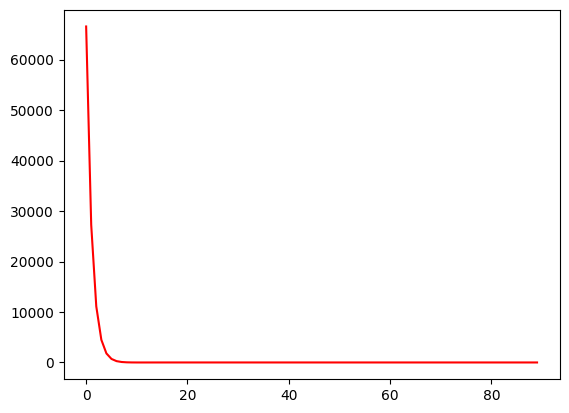

In [17]:
import numpy as np
import matplotlib.pyplot as plot

class Linear_Regression:
    def __init__(self, X, y):
        self.X  = X
        self.y = y
        self.a = [0, 0]
        
    def update_coeffs(self, learningrate):
        y_pred = self.predict()
        y = self.y
        b = len(y)
        self.a[0] = self.a[0] - (learningrate * ( (1 / b) * np.sum(y_pred - y) ) )
        self.a[1] = self.a[1] - (learningrate * ( (1 / b) * np.sum( (y_pred - y) * self.X) ) )
        
    def predict(self, X =[]):
        y_pred = np.array([])
        if not X: 
            X = self.X
        a = self.a
        for x in X:
            y_pred = np.append(y_pred, a[0] + (a[1] * x))
        return y_pred
    
    def get_current_accuracy(self, y_pred):
        t, e = y_pred, self.y
        s = len(y_pred)
        return 1 - sum(
            [
                abs(t[i]-e[i])/e[i]
                for i in range(s)
                if e[i] != 0
            ]
        )/s
        
    def compute_cost(self, y_pred):
        b = len(self.y)
        J = (1/2*b) * (np.sum(y_pred - self.y)**2)
        return J
    
    def plot_best_fit(self, y_pred, fig):
        f = plt.figure(fig)
        plot.scatter(self.X, self.y, color='r')
        plot.plot(self.X, y_pred, color='y')
        f.show()
        
def main():
    X = np.array([i for i in range(11)])
    y = np.array([2*i for i in range(11)])
    
    regr = Linear_Regression(X, y)
    
    iterations = 0
    steps = 90
    learningrate = 0.01
    costs = []
    
    y_pred = regr.predict()
    regr.plot_best_fit(y_pred, 'Initial best fit line')
    
    while 1:
        y_pred = regr.predict()
        cost = regr.compute_cost(y_pred)
        costs.append(cost)
        regr.update_coeffs(learningrate)
        
        iterations += 1
        if iterations % steps == 0:
            print(iterations, "epochs elapsed")
            print("current accuracy is:", regr.get_current_accuracy(y_pred))
            break
    
    # final best-fit line
    regr.plot_best_fit(y_pred, 'Final Best Fit Line')
    
    h = plot.figure('Verification')
    plot.plot(range(iterations), costs, color='r')
    
    h.savefig('Verification.png')
    h.show()
    
    
    regr.predict([i for i in range(10)])

if __name__ == "__main__":
    main()

# Stochastic gradient descent classifier

# stochastic gradient descent regression

# batch gradient descent

# minibatch gradient descent

# logistic regression gradient descent

# Gradient descent linear regression

In [3]:
import numpy as np

print(np.log2(10))

print(2**3.3)

3.321928094887362
9.849155306759329
